<a href="https://colab.research.google.com/github/kasettakorn/nihongo-mnist/blob/main/Japanese_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/rois-codh/kmnist.git

fatal: destination path 'kmnist' already exists and is not an empty directory.


In [2]:
!python /content/kmnist/download_data.py

Please select a download option:
1) Kuzushiji-MNIST (10 classes, 28x28, 70k examples)
2) Kuzushiji-49 (49 classes, 28x28, 270k examples)
3) Kuzushiji-Kanji (3832 classes, 64x64, 140k examples)
> Traceback (most recent call last):
  File "/content/kmnist/download_data.py", line 80, in <module>
    traverse_dict(download_dict)
  File "/content/kmnist/download_data.py", line 63, in traverse_dict
    userinput = input('> ').strip()
KeyboardInterrupt
^C


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical #One hot encoding

# Data collection & preparation

In [4]:
def load_dataset():
    # x_train = np.load("/content/kmnist/k49-train-imgs.npz")['arr_0']
    # y_train = np.load("/content/kmnist/k49-train-labels.npz")['arr_0']
    # x_test = np.load("/content/kmnist/k49-test-imgs.npz")['arr_0']
    # y_test = np.load("/content/kmnist/k49-test-labels.npz")['arr_0']
    x_train = np.load("/content/kmnist-train-imgs.npz")['arr_0']
    y_train = np.load("/content/kmnist-train-labels.npz")['arr_0']
    x_test = np.load("/content/kmnist-test-imgs.npz")['arr_0']
    y_test = np.load("/content/kmnist-test-labels.npz")['arr_0']
    return x_train, y_train, x_test, y_test
x_train, y_train, x_test, y_test = load_dataset()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalize data

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert to one hot encoding

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define model

Epoch 1/10
469/469 [==============================] - 17s 7ms/step - loss: 0.6360 - accuracy: 0.8026 - val_loss: 0.3472 - val_accuracy: 0.8964
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1363 - accuracy: 0.9588 - val_loss: 0.2387 - val_accuracy: 0.9320
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0840 - accuracy: 0.9733 - val_loss: 0.2282 - val_accuracy: 0.9331
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0595 - accuracy: 0.9824 - val_loss: 0.2056 - val_accuracy: 0.9457
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0473 - accuracy: 0.9857 - val_loss: 0.2063 - val_accuracy: 0.9450
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0358 - accuracy: 0.9886 - val_loss: 0.2018 - val_accuracy: 0.9495
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0305 - accuracy: 0.9901 - val_loss: 0.2112 - val_accuracy: 0.9469
Epoch

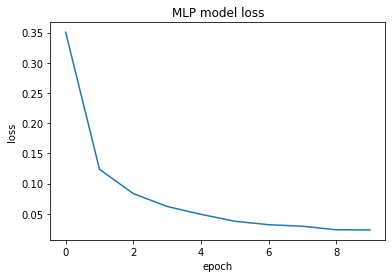

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Dropout(0.25, noise_shape=None))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25, noise_shape=None))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, verbose=1, batch_size=128, validation_data=(x_test, y_test))

plt.plot(history.history['loss'],)
plt.title('MLP model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [8]:
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', round(train_score[1]*100, 2), "%")
print('Test loss:', test_score[0])
print('Test accuracy:', round(test_score[1]*100, 2), "%")

model.save("mnist.h5")

Train loss: 0.004074709489941597
Train accuracy: 99.91 %
Test loss: 0.21080142259597778
Test accuracy: 95.35 %


# Display MNIST

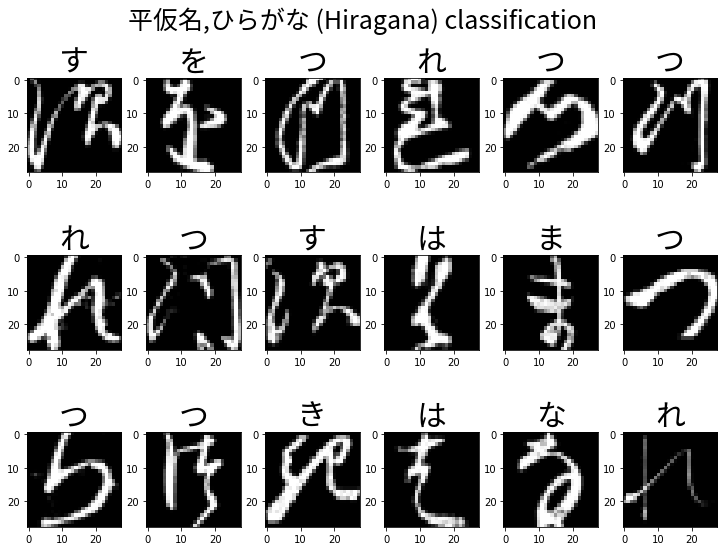

In [51]:
import matplotlib.font_manager as fm
fontprops = fm.FontProperties(fname='/content/NotoSansCJKjp-Regular.otf')


labels = ['お', 'き', 'す', 'つ', 'な', 'は', 'ま', 'や', 'れ', 'を']
fig, axs = plt.subplots(3,6, figsize=(10, 8))

for i, ax in enumerate(axs.flat):
    ax.imshow(cv2.cvtColor(x_test[i], cv2.COLOR_BGR2RGB))
    ax.set_title(labels[np.argmax(y_test[i])], fontproperties = fontprops, fontsize=30)
    
    
fig.suptitle("平仮名,ひらがな (Hiragana) classification", fontsize=25, fontproperties = fontprops)
fig.tight_layout(pad=0.5)
# fig.supxlabel('')
# fig.supylabel('')
plt.show()